<a href="https://colab.research.google.com/github/naldo14/tesis-/blob/main/dwt_y.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pywt
import sys
import h5py #librerua para crear archivos , h5py
import pandas as pd
import math
from scipy.fft import fft, fftfreq

In [2]:
#hacer el mounted de mi cuenta drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
sys.path.insert(0,"/content/drive/My Drive/Colab Notebooks")
import unzipmodule
import graficador

In [3]:
def z_score_normalization_from_coeffs(coeffs):
    energies = []
    for sub_array in coeffs:
        energy = np.sum(np.abs(sub_array) ** 2)
        energies.append(energy)

    mean_energy = np.mean(energies)
    std_energy = np.std(energies)

    # Calculate Z-scores
    z_scores = [(energy - mean_energy) / std_energy for energy in energies]

    return z_scores

In [5]:

def get_selected_key_and_data(h5py_file_path, index=0):
    with h5py.File(h5py_file_path, 'r') as h5_file:
        keys_1 = list(h5_file.keys())
        selected_key = keys_1[index]
        selected_data = h5_file[selected_key][:]
        print("Selected Key:", selected_key)
    return selected_key, selected_data

In [6]:
def get_lengths_array(coeffs, upper_level):
    sample_counts = [len(arr) for arr in coeffs]
    time_arrays = [np.linspace(0, upper_level, num=samples, endpoint=False) for samples in sample_counts]
    return time_arrays

In [7]:
def plot_graphs(time_arrays_1, coeffs_1, time_arrays_2, coeffs_2):
    num_graphs = len(time_arrays_1)  # Assuming both sets have the same length

    title = [None] * num_graphs
    title[0] = "A" + str(num_graphs - 1)
    title[1] = "D" + str(num_graphs - 1)

    for i in range(2, num_graphs):
        title[i] = "D" + str(num_graphs - i)

    for i in range(num_graphs):
        plt.figure(figsize=(12, 5))  # Adjust the figure size as needed
        # Create titles based on coefficient array lengths
        title_set_1 = title[i]
        title_set_2 = title[i]

        # Check if index is within the range of arrays
        if i < len(time_arrays_1) and i < len(coeffs_1):
            # Plot the first set (time_arrays_1 vs coeffs_1)
            plt.subplot(1, 2, 1)
            plt.plot(time_arrays_1[i], coeffs_1[i], label=title_set_1, color='red')
            plt.xlabel('Time')
            plt.ylabel('Coefficient Value')
            plt.legend()
            plt.title(f'Graph {i} - Set 1: {title_set_1}')

            # Plot the second set (time_arrays_2 vs coeffs_2)
            plt.subplot(1, 2, 2)
            plt.plot(time_arrays_2[i], coeffs_2[i], label=title_set_2, color='blue')
            plt.xlabel('Time')
            plt.ylabel('Coefficient Value')
            plt.legend()
            plt.title(f'Graph {i} - Set 2: {title_set_2}')

            plt.tight_layout()  # Adjust the layout for better visualization
            plt.show()  # Display the current plot window

    return title

In [7]:

def band_maker(coeffs, fs, title):
    p = len(coeffs)- 1
    low_frequencies = [None] * len(coeffs)
    high_frequencies = [None] * len(coeffs)

    # low_frequencies[0] = 0
    # high_frequencies[0] = fs / (2 ** (p) * 2)
    for i in range(0, len(coeffs)):
         high_frequencies[i] = fs / (2 ** (p+-i + 1))
    low_frequencies[0]=0
    low_frequencies[1:len(low_frequencies)]= high_frequencies[:len(low_frequencies) - 1]



    return  high_frequencies,low_frequencies


In [8]:
def frequencies_maker(N,fs,d,D,theta):
  theta=(theta/180)*np.pi
  FTF=(fs/2)*(1-d/D*np.cos(theta))
  BPFI=(N*fs/2)*(1+d/D*np.cos(theta))
  BPFO=(N*fs/2)*(1-d/D*np.cos(theta))
  BSF=(D*fs/d)*(1-(d/D)**2*np.cos(theta))
  return(FTF,BPFI,BPFO,BSF)


In [9]:
#celda para crear la lista con los paths de mi data
paths=[] #creo la lista de pahts
names=[] #creo la lista de nombres
output_file=[]
paths.append('/content/drive/MyDrive/tesis USB /Vibration, acoustic, temperature, and motor current dataset of rotating machine under varying operating conditions for fault diagnosis (korea)/vibration_1')
paths.append('/content/drive/MyDrive/tesis USB /Vibration, acoustic, temperature, and motor current dataset of rotating machine under varying operating conditions for fault diagnosis (korea)/part1')
paths.append('/content/drive/MyDrive/tesis USB /Vibration, acoustic, temperature, and motor current dataset of rotating machine under varying operating conditions for fault diagnosis (korea)/part2')
paths.append('/content/drive/MyDrive/tesis USB /Vibration, acoustic, temperature, and motor current dataset of rotating machine under varying operating conditions for fault diagnosis (korea)/part3')
names.append('vibration')
names.append('part1')
names.append('part2')
names.append('part3')
output_file.append('/content/drive/MyDrive/tesis USB /Vibration, acoustic, temperature, and motor current dataset of rotating machine under varying operating conditions for fault diagnosis (korea)/vibration_1/vibration')
output_file.append('/content/drive/MyDrive/tesis USB /Vibration, acoustic, temperature, and motor current dataset of rotating machine under varying operating conditions for fault diagnosis (korea)/part1/part1')
output_file.append('/content/drive/MyDrive/tesis USB /Vibration, acoustic, temperature, and motor current dataset of rotating machine under varying operating conditions for fault diagnosis (korea)/part2/part2')
output_file.append('/content/drive/MyDrive/tesis USB /Vibration, acoustic, temperature, and motor current dataset of rotating machine under varying operating conditions for fault diagnosis (korea)/part3/part3')


In [ ]:
 print(pywt.families())

['haar', 'db', 'sym', 'coif', 'bior', 'rbio', 'dmey', 'gaus', 'mexh', 'morl', 'cgau', 'shan', 'fbsp', 'cmor']


In [ ]:
print(pywt.wavelist('db'))

['db1', 'db2', 'db3', 'db4', 'db5', 'db6', 'db7', 'db8', 'db9', 'db10', 'db11', 'db12', 'db13', 'db14', 'db15', 'db16', 'db17', 'db18', 'db19', 'db20', 'db21', 'db22', 'db23', 'db24', 'db25', 'db26', 'db27', 'db28', 'db29', 'db30', 'db31', 'db32', 'db33', 'db34', 'db35', 'db36', 'db37', 'db38']


In [10]:
FTF,BPFI,BPFO,BSF=frequencies_maker(9,50.17,7.90,38.5,0)
data = {
    'Name': ['Fundamental train frequency (FTF)', 'Ball pass frequency inner (BPFI)', 'Ball pass frequency outer (BPFO)','Ball spin frequency (BSF)'],
    'Values (HZ)': [FTF, BPFI, BPFO,BSF]
}

# Create a dataframe from the dictionary
df = pd.DataFrame(data)

# Print the dataframe
print(df)

                                Name  Values (HZ)
0  Fundamental train frequency (FTF)    19.937688
1   Ball pass frequency inner (BPFI)   272.090805
2   Ball pass frequency outer (BPFO)   179.439195
3          Ball spin frequency (BSF)   234.204744


In [11]:
## calculo el nivel del banco de filtro:
fs=math.ceil(FTF) #frecuencia natural , se usa la del train frequencie
fe=25.6e3 # frecuencia de sampleo
n = math.ceil(math.log(fe / fs) / math.log(2)) +2
level = n

Available files:
1. vibration_ball_0
2. vibration_ball_1
3. vibration_ball_2
4. vibration_ball_constant
5. vibration_inner_0
6. vibration_inner_1
7. vibration_inner_2
8. vibration_inner_constant
9. vibration_normal_0
10. vibration_normal_1
11. vibration_normal_2
12. vibration_normal_constant
13. vibration_outer_0
14. vibration_outer_1
15. vibration_outer_2
16. vibration_outer_constant
Enter the index of the file you want to plot: 13


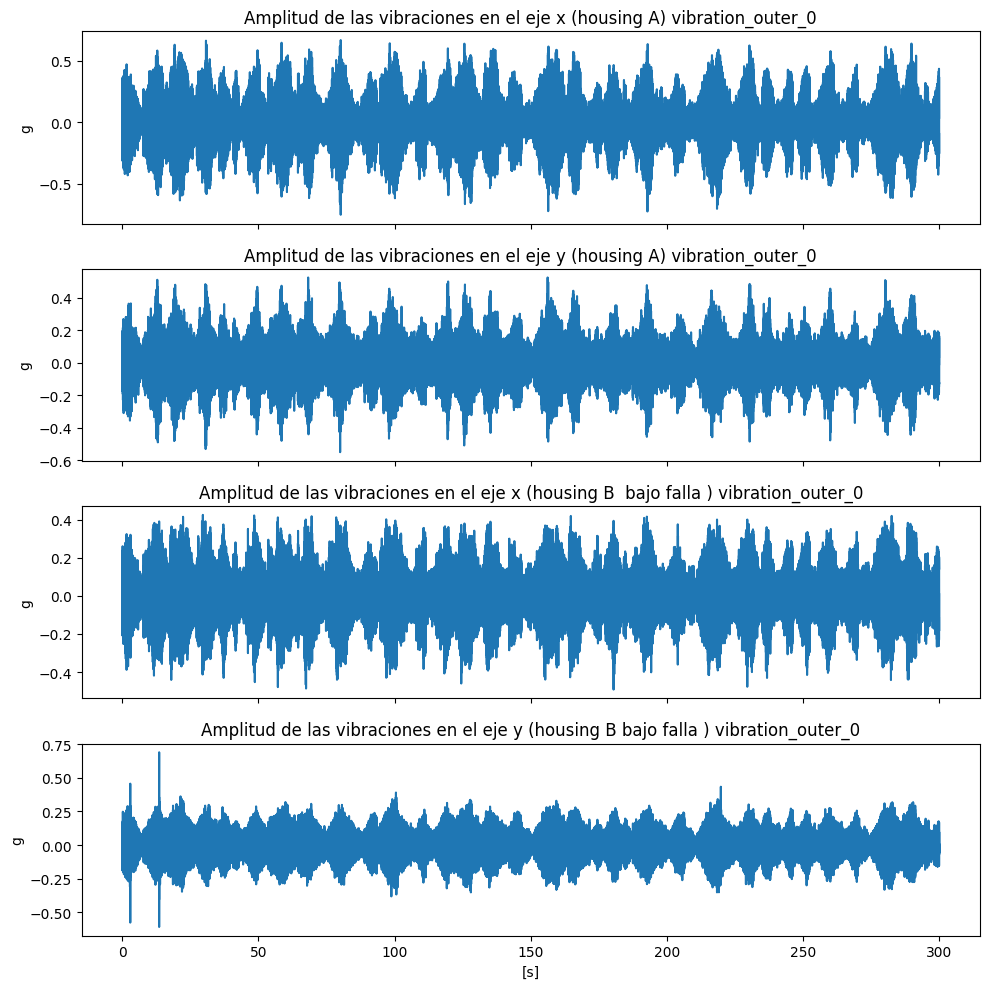

In [13]:
time_array=graficador.plot_data_from_h5py(output_file[1])

In [79]:
h5py_file_path=output_file[1]
selected_key_fault,selected_data_fault=get_selected_key_and_data(h5py_file_path, index=4)

Selected Key: vibration_inner_0


In [80]:

w = pywt.Wavelet('db38')
signal_faulty= selected_data_fault[:,3] ##rodamiento b bajo falla (eje y)
# # Perform DWT
coeffs_2 = pywt.wavedec(signal_faulty, w, level=level)
time_arrays_2=get_lengths_array(coeffs_2,300)

Available files:
1. vibration_ball_0
2. vibration_ball_1
3. vibration_ball_2
4. vibration_ball_constant
5. vibration_inner_0
6. vibration_inner_1
7. vibration_inner_2
8. vibration_inner_constant
9. vibration_normal_0
10. vibration_normal_1
11. vibration_normal_2
12. vibration_normal_constant
13. vibration_outer_0
14. vibration_outer_1
15. vibration_outer_2
16. vibration_outer_constant
Enter the index of the file you want to plot: 9


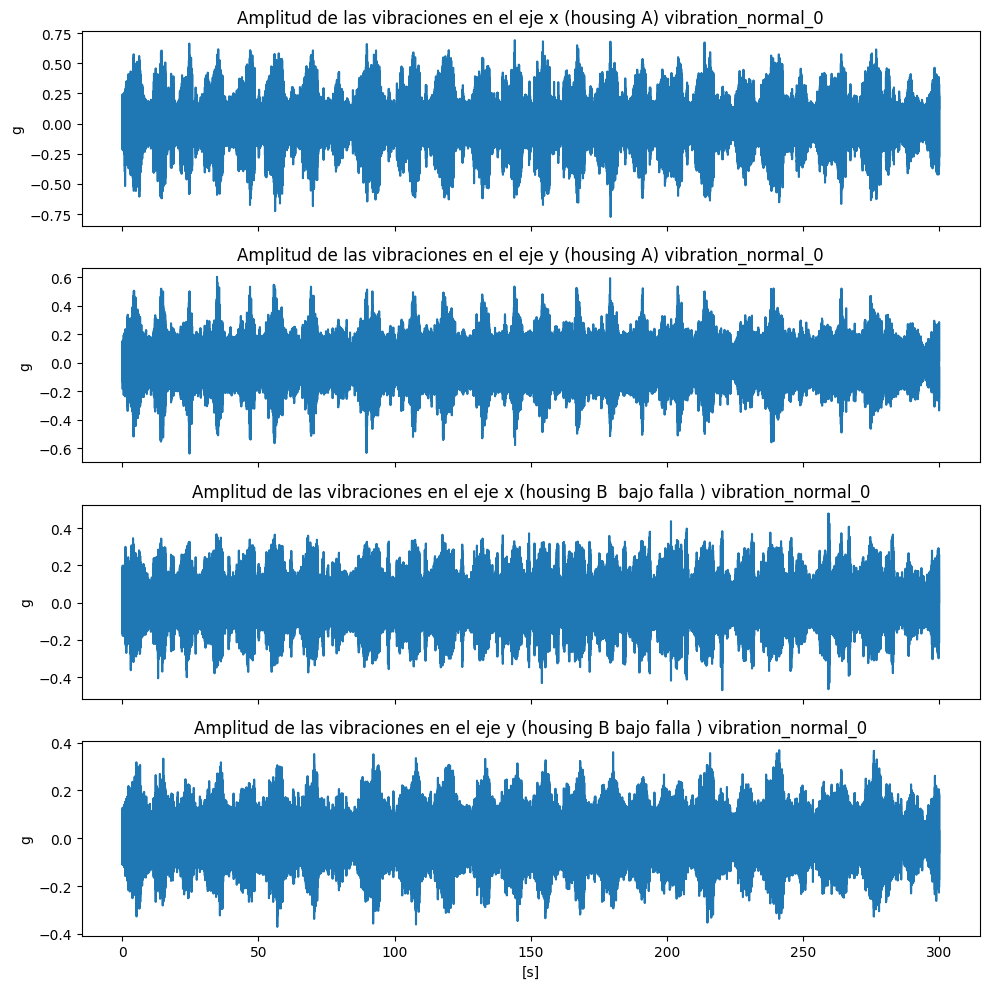

In [18]:
time_array=graficador.plot_data_from_h5py(output_file[1])

In [38]:
h5py_file_path=output_file[1]
selected_key_healty,selected_data_healty=get_selected_key_and_data(h5py_file_path, index=8)

Selected Key: vibration_normal_0


In [39]:
##3calculo   B  en el eje y sano
w = pywt.Wavelet('db38')
signal_healty= selected_data_healty [:,3]
# # Perform DWT
coeffs_1 = pywt.wavedec(signal_healty, w, level=level)
time_arrays_1=get_lengths_array(coeffs_1,300)

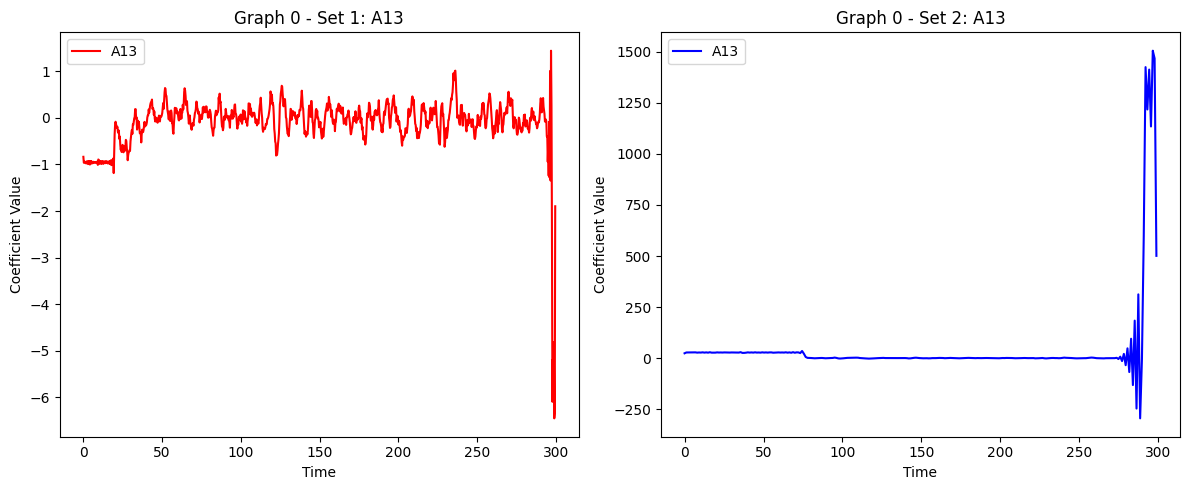

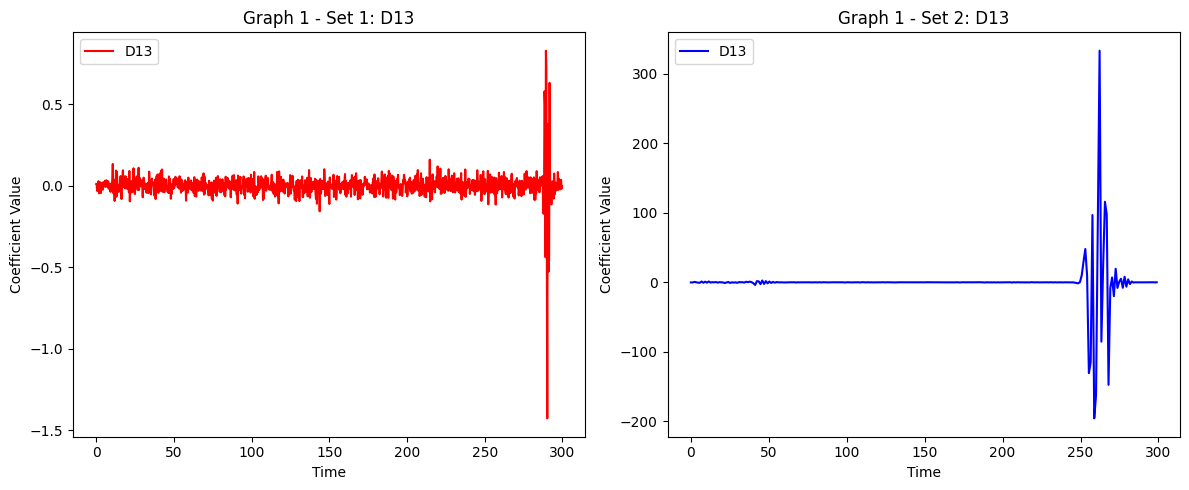

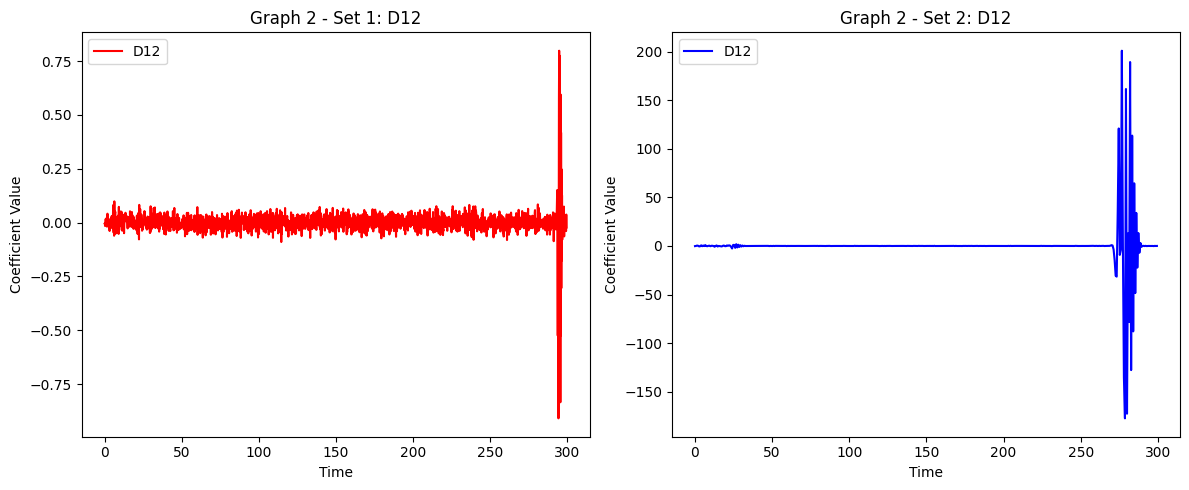

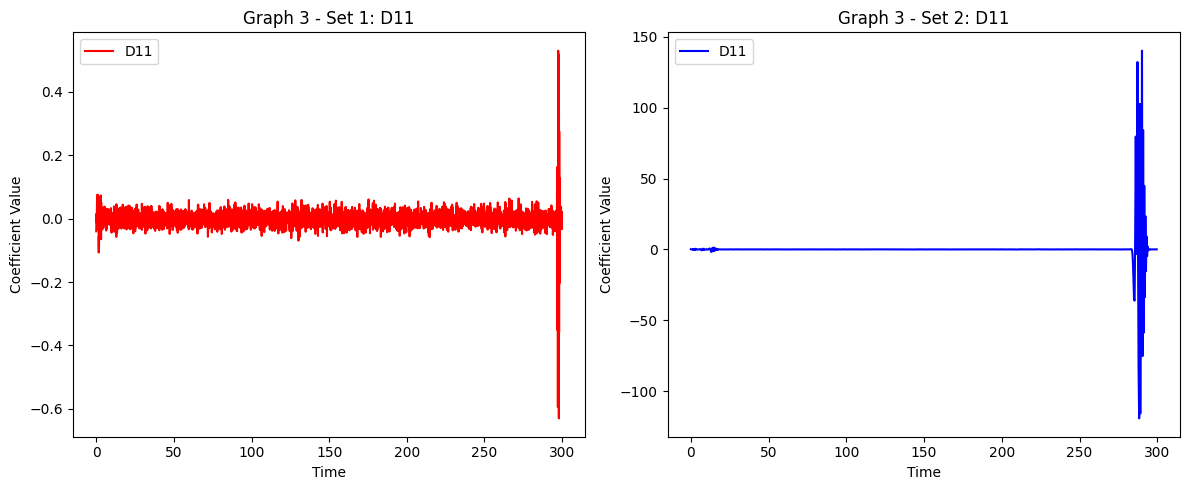

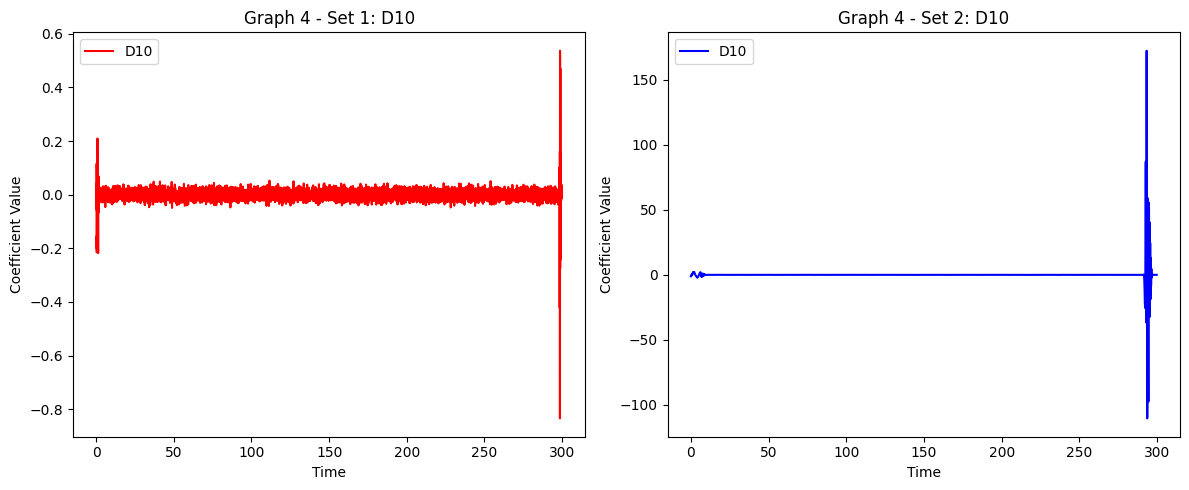

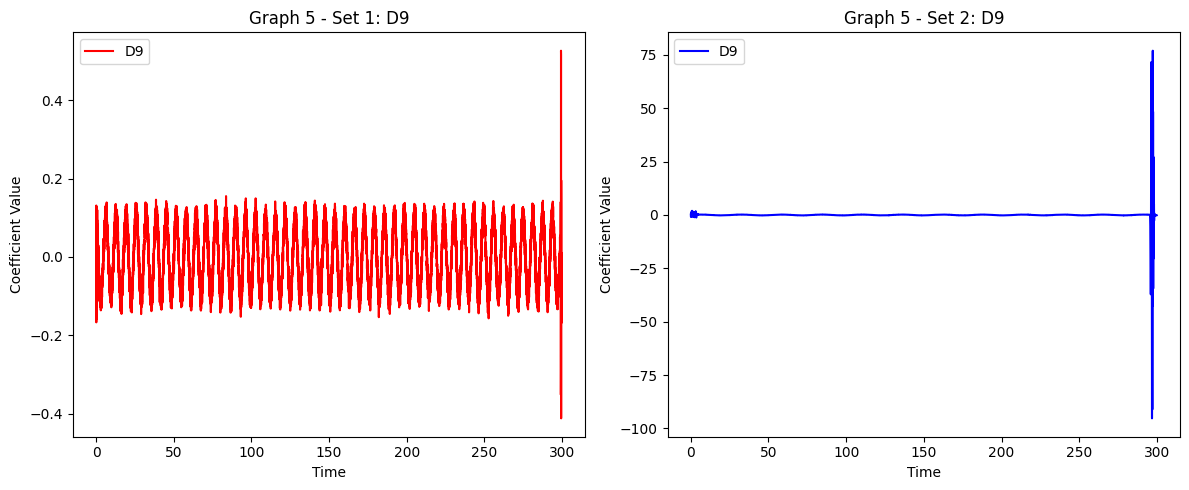

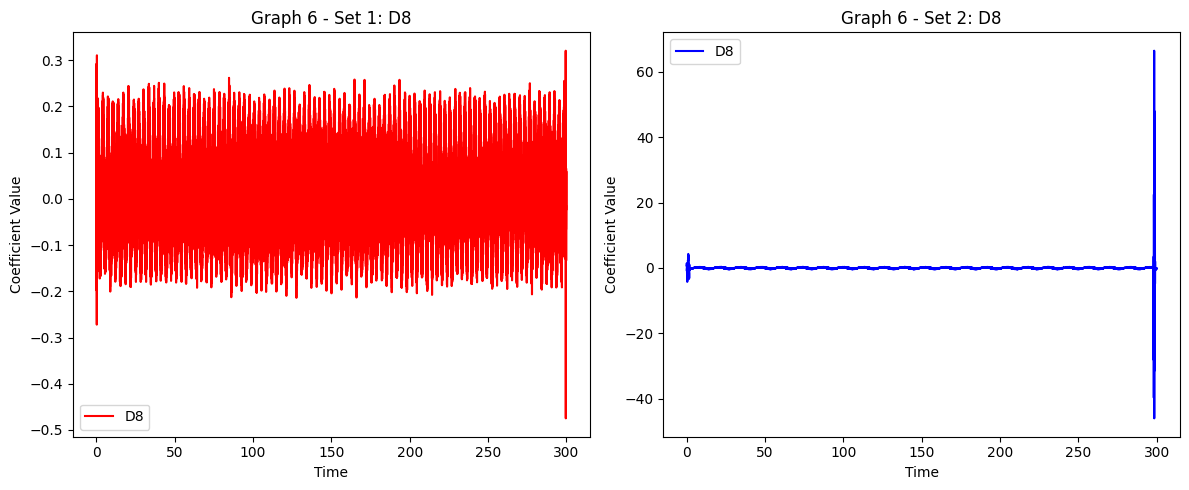

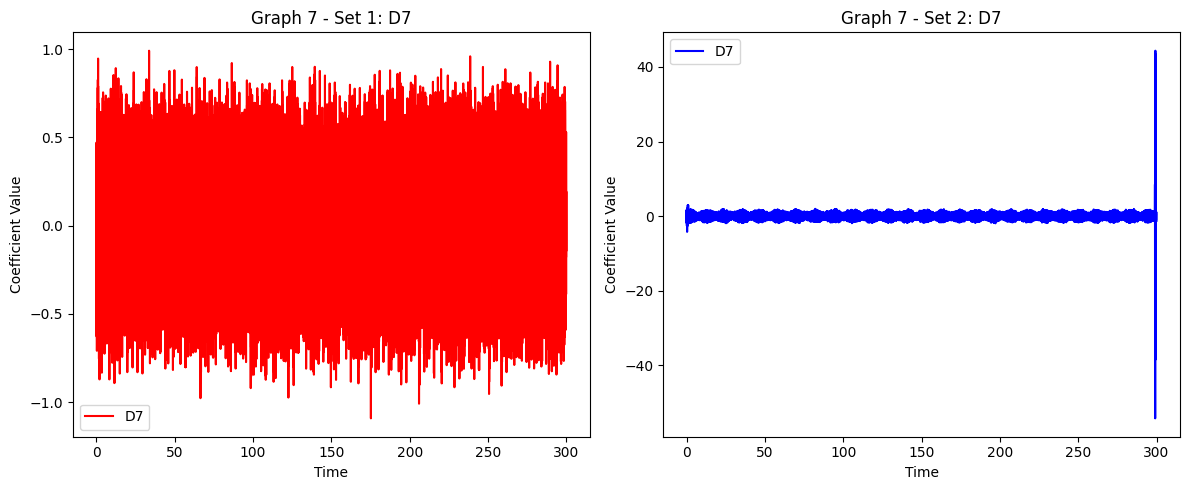

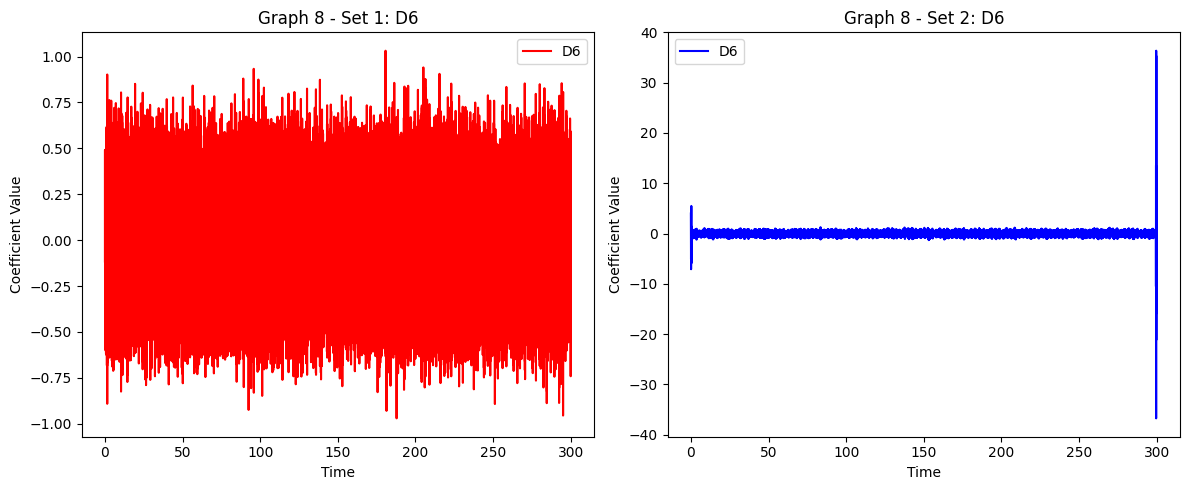

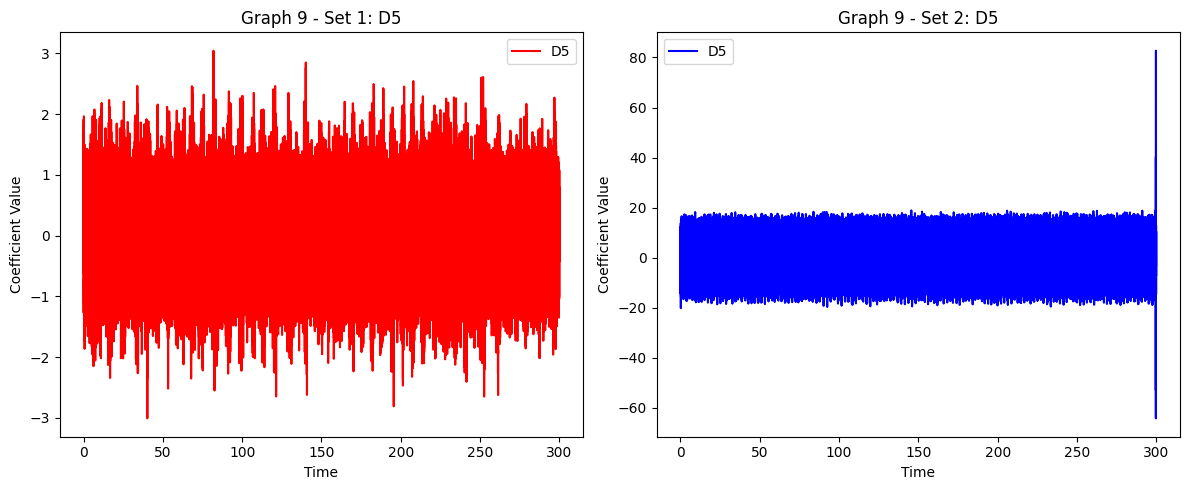

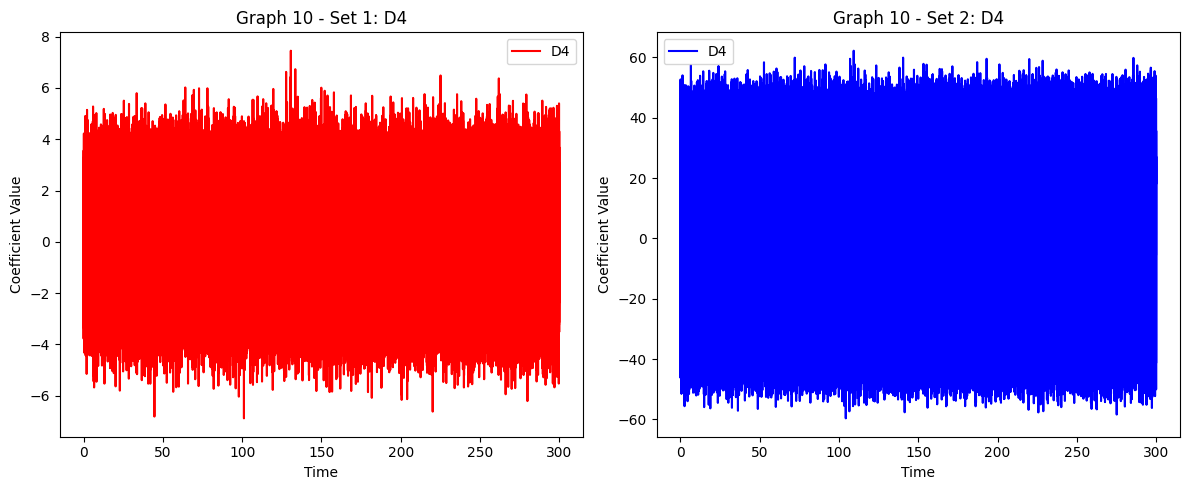

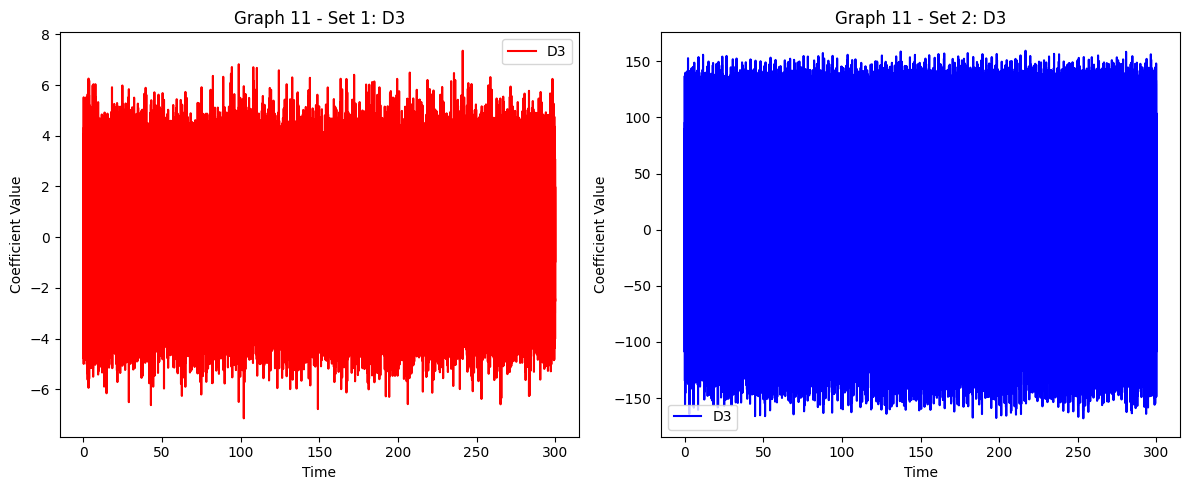

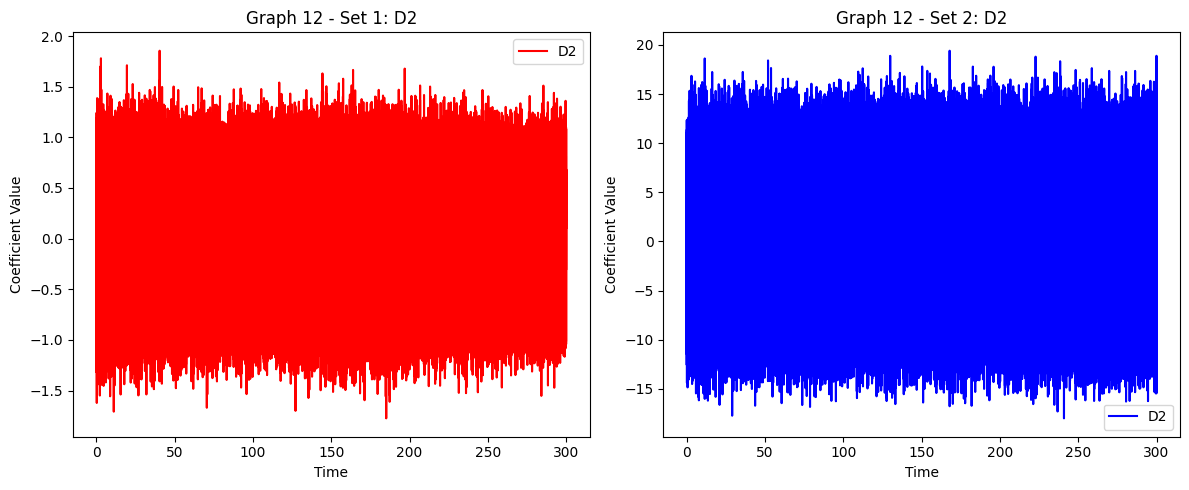

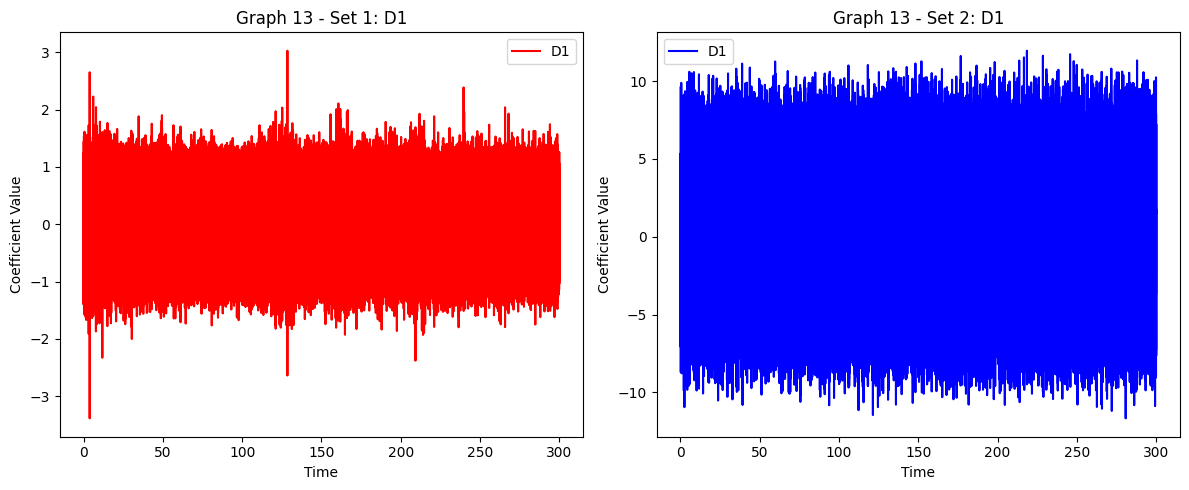

In [ ]:
title=plot_graphs(time_arrays_1, coeffs_1, time_arrays_2, coeffs_2)

In [ ]:

fs = 25.6e3
high_frequencies,  low_frequencies = band_maker(coeffs_2, fs, title)
df = pd.DataFrame({'Coefficient': title, 'Low Frequency': low_frequencies, 'High Frequency': high_frequencies})
df


,Coefficient,Low Frequency,High Frequency
0,A13,0.0000,1.5625
1,D13,1.5625,3.1250
2,D12,3.1250,6.2500
3,D11,6.2500,12.5000
4,D10,12.5000,25.0000
5,D9,25.0000,50.0000
6,D8,50.0000,100.0000
7,D7,100.0000,200.0000
8,D6,200.0000,400.0000
9,D5,400.0000,800.0000


In [81]:

normalized_energies_faulty=z_score_normalization_from_coeffs(coeffs_2)

In [40]:
normalized_energies_healty=z_score_normalization_from_coeffs(coeffs_1)

In [82]:
# Normalize the energies_healty array
df1 = pd.DataFrame({ 'Nivel de energia rodamiento sano normalizado':  normalized_energies_healty, 'Nivel de energia rodamiento bajo falla normalizado ': normalized_energies_faulty})
df1

,Nivel de energia rodamiento sano normalizado,Nivel de energia rodamiento bajo falla normalizado
0,-0.553321,-0.378543
1,-0.555517,-0.379068
2,-0.555521,-0.379069
3,-0.555537,-0.379075
4,-0.555461,-0.379072
5,-0.555038,-0.379064
6,-0.553928,-0.379070
7,-0.554282,-0.379057
8,-0.547745,-0.378868
9,-0.324269,-0.365049


In [19]:
def find_indices_with_name(h5py_file_path, target_name): # #esta funcion me permite buscar los indices asociados a a mi palabra target
    indices = []

    with h5py.File(h5py_file_path, 'r') as h5_file:
        keys = list(h5_file.keys())
        for index, key in enumerate(keys):
            if target_name in key:
                indices.append(index)

    return indices

In [20]:
def get_selected_keys_and_data(h5py_file_path, target_name, index): #funcion que en base a los indices me devuelve las keys
    selected_keys = []

    with h5py.File(h5py_file_path, 'r') as h5_file:
        keys = list(h5_file.keys())
        for key in keys:
            if target_name in key:
                selected_keys.append(key)


    return selected_keys

In [21]:
def return_data(output_file, target_name):
  all_selected_keys_1 = []

  for file_path in output_file:
      indices = find_indices_with_name(file_path, target_name)
      selected_keys = get_selected_keys_and_data(file_path,target_name, indices)

      for key in (selected_keys):
          all_selected_keys_1.append([key])
  all_keys= [None] * len(all_selected_keys_1)
  ##########################################
  for i in range(0,len(all_selected_keys_1)): # aqui creo la lista para guardar los string de las key
      all_keys[i]=all_selected_keys_1[i][0]
      #######################################
  selected_data = []
  #########################################
  for selected_key in all_keys: # algoritmo para obtener la data en el orden de las keys
    for file_path in output_file:
      with h5py.File(file_path, 'r') as h5_file:
        keys = list(h5_file.keys())
        if selected_key in keys:
          #print("esta en el archivo")
          selected_data.append( h5_file[selected_key][:])

        else:
          #print('no esta ')
          continue

  return (all_keys,selected_data)


In [22]:
def calculate_energy_levels(selected_data, wavelet='db38', level=5): #funcion para calcular los niveles energeticos de los data set
    w = pywt.Wavelet(wavelet)
    array_dwt = np.empty((len(selected_data), selected_data[0].shape[1]), dtype=list)

    for j in range(len(selected_data)):
        for i in range(selected_data[j].shape[1]):
            coeffs = pywt.wavedec(selected_data[j][:, i], w, level=level)
            energies_levels = [np.sum(np.abs(coeffs)**2) for coeffs in coeffs]
            array_dwt[j, i] = energies_levels

    return array_dwt

In [23]:


def normalize_energies(energies_level):
    mean_energy = np.mean(energies_level)
    std_energy = np.std(energies_level)

    # Calculate Z-scores
    z_scores = [(energy - mean_energy) / std_energy for energy in energies_level]
    return z_scores


In [24]:
def data_set_two(coeff, all_keys_n_w_constant, all_keys_f_w_constant, energy_level_n_w_constant, energy_level_f_w_constant):  #funcion para determinar el nivel energetico para los rodamientos A y B bajo falla en el segundo data set
    energies_level_f_B = []
    energies_level_f_name_B = []
    energies_level_f_A = []
    energies_level_f_name_A = []

    for i, name_normal in enumerate(all_keys_n_w_constant):
        for j, name_faulty in enumerate(all_keys_f_w_constant):
            if name_normal[0:3] == name_faulty[0:3]:
                if 2>1:  # eje y de la casa de rodamientos A
                    energies_level_f_A.append(energy_level_f_w_constant[j][1]) #tenia trozo de error aqui , el 1 indica el eje y del rodamiento A
                    energies_level_f_name_A.append(name_faulty)
                if 2>1:  # eje y de la casa de rodamientos B
                    energies_level_f_B.append(energy_level_f_w_constant[j][3]) #el 3 indica el eje y del rodamiento B
                    energies_level_f_name_B.append(name_faulty)

    return energies_level_f_A, energies_level_f_B, energies_level_f_name_A, energies_level_f_name_B

In [25]:
def concatenation(energies):### funcion para convertir los void array in normal array to train the network
    converted_arrays = [np.array(element[0]) for element in energies]
    resulting_array = np.vstack(converted_arrays)

    return resulting_array

In [ ]:
def create_mask_array(layers):
    # Initialize an empty mask array
    mask_array = np.zeros(len(layers), dtype=int)

    # Check each element of the 'layers' array
    for i, layer in enumerate(layers):
        # Check if the word "normal" or "Normal" is not in the layer name
        if "normal" not in layer.lower() and "Normal" not in layer:
            mask_array[i] = 1  # Set the corresponding element to 1

    return mask_array

### Parte  segundo data set

Calculo de los coeficientes energeticos para el caso vibration_normal (velocidad variable)


In [26]:
all_keys_normal,selected_data_normal=return_data(output_file, "normal")

In [27]:
energies_level_normal=calculate_energy_levels(selected_data_normal, wavelet='db38', level=level)#aqui calculo los niveles energeticos para los 4 rodamientos

Calculo de los coeficientes energeticos para el caso vibration_ball (velocidad variable)


In [28]:
all_keys_ball,selected_data_ball=return_data(output_file, "ball")

In [29]:
energies_level_ball=calculate_energy_levels(selected_data_ball, wavelet='db38', level=level) #aqui calculo los niveles energeticos para los 4 rodamientos

Calculo de los coeficientes energeticos para el caso vibration_inner  (velocidad variable)



In [30]:
all_keys_inner,selected_data_inner=return_data(output_file, "inner")

In [31]:
energies_level_inner=calculate_energy_levels(selected_data_inner, wavelet='db38', level=level)#aqui calculo los niveles energeticos para los 4 rodamientos

Calculo de los coeficientes energeticos para el caso vibration_outer (velocidad variable)

In [32]:
all_keys_outer,selected_data_outer=return_data(output_file, "outer")

In [33]:
energies_level_outer=calculate_energy_levels(selected_data_outer, wavelet='db38', level=level)#aqui calculo los niveles energeticos para los 4 rodamientos

Selecciono el eje y para cada falla en base a una comparacio (veo la maxima energia del coeficiente 7 para fallas outer y la maxima energia en el coeficiente 6 para fallas inner y ball) (es necesario cambiar esto)


In [34]:
# trabajo solo con el eje y
# Create structured arrays with specific data types and length
energies_level_outer_B =[]
energies_level_outer_name =[]
energies_level_inner_B =[]
energies_level_inner_name =[]
energies_level_ball_B =[]
energies_level_ball_name =[]

for i in range(0, energies_level_normal.shape[0]):
    if 2>1:# coefficnete 7
        energies_level_outer_B.append(energies_level_outer[i][3]) # el tres indica que solo estoy trabajando con el eje y del rodamiento B
        energies_level_outer_name.append(all_keys_outer[i])
    if 2>1: # coeficiente 6
        energies_level_inner_B.append(energies_level_inner[i][3])
        energies_level_inner_name.append(all_keys_inner[i])
    if 2>1: # coeficiente 6
        energies_level_ball_B.append( energies_level_ball[i][3])
        energies_level_ball_name.append(all_keys_ball[i])


Calculo los niveles energeticos normalizados para el caso de rodamiento sano

In [35]:
dtype = np.dtype([
    ('field0', object),  # You can change 'field0' to a more meaningful name
    ('field1', object),  # You can change 'field1' to a more meaningful name
    ('field2', object),  # You can change 'field2' to a more meaningful name
    ('field3', object)   # You can change 'field3' to a more meaningful name
])

# Create an empty structured array with the same length as energies_level_normal
energies_level_normal_normalized = np.empty(len(energies_level_normal), dtype=dtype)
for i, x in enumerate(all_keys_normal):
  energies_level_normal_normalized['field0'][i] = normalize_energies(energies_level_normal[i][0])
  energies_level_normal_normalized['field1'][i] = normalize_energies(energies_level_normal[i][1])#eje y rodamiento A
  energies_level_normal_normalized['field2'][i] = normalize_energies(energies_level_normal[i][2])
  energies_level_normal_normalized['field3'][i] = normalize_energies(energies_level_normal[i][3])#eje y rodamiento B

#aqui trabajo con ambos ejes y ambos rodamientos la seleccion con el eje x la hago en la concatenacion


In [43]:
all_keys_normal

['vibration_normal_0',
 'vibration_normal_1',
 'vibration_normal_2',
 'vibration_normal_constant',
 'vibration_normal_3',
 'vibration_normal_4',
 'vibration_normal_5',
 'vibration_normal_6']

In [69]:
 energies_level_normal_normalized[0][3]==df1['Nivel de energia rodamiento sano normalizado']

0     True
1     True
2     True
3     True
4     True
5     True
6     True
7     True
8     True
9     True
10    True
11    True
12    True
13    True
Name: Nivel de energia rodamiento sano normalizado, dtype: bool

Calculo los niveles energeticos normalizados para el caso de falla en el elemento rodante

In [50]:

# Define your normalize_energies function (as shown previously)

# Create a structured array to store the normalized arrays
dtype = np.dtype([
    ('field0', object),  # You can change 'field0' to a more meaningful name
])

# Create an empty structured array with the same length as energies_level_normal
energies_level_ball_normalized = np.empty(len(energies_level_ball_B), dtype=dtype)

# Loop through each element in energies_level_normal and normalize the arrays
for i,x in enumerate(energies_level_ball_name):
    energies_level_ball_normalized['field0'][i] = normalize_energies(energies_level_ball_B[i]) ### pendiente, data donde esta almacenado los vectores a usar como entrenamiento en el orden dado por las listas de nombres




In [78]:
energies_level_ball_normalized[0][0]==df1['Nivel de energia rodamiento bajo falla normalizado ']

0     True
1     True
2     True
3     True
4     True
5     True
6     True
7     True
8     True
9     True
10    True
11    True
12    True
13    True
Name: Nivel de energia rodamiento bajo falla normalizado , dtype: bool

Calculo los niveles energeticos normalizados para el caso de falla en el anillo interno

In [51]:

# Define your normalize_energies function (as shown previously)

# Create a structured array to store the normalized arrays
dtype = np.dtype([
    ('field0', object),  # You can change 'field0' to a more meaningful name
])

# Create an empty structured array with the same length as energies_level_normal
energies_level_inner_normalized = np.empty(len(energies_level_inner_B), dtype=dtype)

# Loop through each element in energies_level_normal and normalize the arrays
for i,x in enumerate(energies_level_inner_name):
    energies_level_inner_normalized['field0'][i] = normalize_energies(energies_level_inner_B[i]) ### pendiente, data donde esta almacenado los vectores a usar como entrenamiento en el orden dado por las listas de nombres

In [85]:
energies_level_inner_name

['vibration_inner_0',
 'vibration_inner_1',
 'vibration_inner_2',
 'vibration_inner_constant',
 'vibration_inner_3',
 'vibration_inner_4',
 'vibration_inner_5',
 'vibration_inner_6']

In [87]:
energies_level_inner_normalized[0][0]==df1['Nivel de energia rodamiento bajo falla normalizado ']

0     True
1     True
2     True
3     True
4     True
5     True
6     True
7     True
8     True
9     True
10    True
11    True
12    True
13    True
Name: Nivel de energia rodamiento bajo falla normalizado , dtype: bool

Calculo los niveles energeticos normalizados para el caso de falla en el anillo externo

In [52]:

# Define your normalize_energies function (as shown previously)

# Create a structured array to store the normalized arrays
dtype = np.dtype([
    ('field0', object),  # You can change 'field0' to a more meaningful name
])

# Create an empty structured array with the same length as energies_level_normal
energies_level_outer_normalized = np.empty(len(energies_level_outer_B), dtype=dtype)

# Loop through each element in energies_level_normal and normalize the arrays
for i,x in enumerate(energies_level_outer_name):
    energies_level_outer_normalized['field0'][i] = normalize_energies(energies_level_outer_B[i])  ### pendiente, data donde esta almacenado los vectores a usar como entrenamiento en el orden dado por las listas de nombres

In [53]:
energies_level_outer_name

['vibration_outer_0',
 'vibration_outer_1',
 'vibration_outer_2',
 'vibration_outer_constant',
 'vibration_outer_3',
 'vibration_outer_4',
 'vibration_outer_5',
 'vibration_outer_6']

In [55]:
energies_level_outer_normalized[0]

(list([-0.5303157711911253, -0.5327991161653148, -0.532803909370388, -0.532773525342236, -0.5318788786693525, -0.5310282813302609, -0.5322427761141857, -0.5323347091827795, -0.526540404471701, -0.340478147381497, -0.3155965416830795, 0.8956676223115233, 2.0259688647473166, 2.51715557384308]),)

In [57]:
energies_level_outer_normalized[0][0]==df1['Nivel de energia rodamiento bajo falla normalizado ']

0     True
1     True
2     True
3     True
4     True
5     True
6     True
7     True
8     True
9     True
10    True
11    True
12    True
13    True
Name: Nivel de energia rodamiento bajo falla normalizado , dtype: bool

## Parte 2 primer data set (velocidad constante , carga variable)

In [160]:
all_keys_normal_w_constant,selected_data_normal_w_constant=return_data(output_file, "Normal")
energies_level_normal_w_constant=calculate_energy_levels(selected_data_normal_w_constant, wavelet='db38', level=level)

In [177]:
all_keys_inner_w_constant,selected_data_inner_w_constant=return_data(output_file, "BPFI")
energies_level_inner_w_constant=calculate_energy_levels(selected_data_inner_w_constant, wavelet='db38', level=level)

In [161]:
### aqui esta bien el calculo de los niveles energeticos , la quinta columna de selcted_data es el tiempo
all_keys_outter_w_constant,selected_data_outter_w_constant=return_data(output_file, "BPFO")
energies_level_outter_w_constant=calculate_energy_levels(selected_data_outter_w_constant, wavelet='db38', level=level)

### Calculo de los niveles energeticos por rodamiento (A y B)

In [179]:
energies_level_inner_A_constant, energies_level_inner_B_constant, energies_level_inner_name_A_constant, energies_level_inner_name_B_constant= data_set_two(8, all_keys_normal_w_constant, all_keys_inner_w_constant, energies_level_normal_w_constant, energies_level_inner_w_constant)

In [115]:
### aqu esta el error , ya lo resolvi ????
energies_level_outter_A_constant, energies_level_outter_B_constant, energies_level_outter_name_A_constant, energies_level_outter_name_B_constant= data_set_two(7, all_keys_normal_w_constant, all_keys_outter_w_constant, energies_level_normal_w_constant, energies_level_outter_w_constant)

### calculo de los niveles normalizados para el caso de rodamiento sano

In [31]:
dtype = np.dtype([
    ('field0', object),  # You can change 'field0' to a more meaningful name
    ('field1', object),  # You can change 'field1' to a more meaningful name
    ('field2', object),  # You can change 'field2' to a more meaningful name
    ('field3', object)   # You can change 'field3' to a more meaningful name
])

# Create an empty structured array with the same length as energies_level_normal
energies_level_normal_w_constant_normalized = np.empty(len(energies_level_normal_w_constant), dtype=dtype)
for i, x in enumerate(all_keys_normal_w_constant):
  energies_level_normal_w_constant_normalized['field0'][i] = normalize_energies(energies_level_normal_w_constant[i][0]) #eje x rodamiento A
  energies_level_normal_w_constant_normalized['field1'][i] = normalize_energies(energies_level_normal_w_constant[i][1]) #eje y rodamiento A
  energies_level_normal_w_constant_normalized['field2'][i] = normalize_energies(energies_level_normal_w_constant[i][2]) #eje x rodamiento B
  energies_level_normal_w_constant_normalized['field3'][i] = normalize_energies(energies_level_normal_w_constant[i][3]) #eje y rodamiento B

In [ ]:
all_keys_normal_w_constant

['0Nm_Normal', '2Nm_Normal', '4Nm_Normal']

###Calculo de los niveles normalizados para el caso en el anillo interno  por rodamiento (A y B)

Niveles normalizados anillo interno

In [180]:

# Create a structured array to store the normalized arrays
dtype = np.dtype([
    ('field0', object),  # You can change 'field0' to a more meaningful name
])

# Create an empty structured array with the same length as energies_level_normal
energies_level_inner_normalized_A_w_constant= np.empty(len(energies_level_inner_A_constant), dtype=dtype)

# Loop through each element in energies_level_normal and normalize the arrays
for i,x in enumerate(energies_level_inner_name_A_constant):
    energies_level_inner_normalized_A_w_constant['field0'][i] = normalize_energies(energies_level_inner_A_constant[i]) ### pendiente, data donde esta almacenado los vectores a usar como entrenamiento en el orden dado por las listas de nombres

In [181]:
# Define your normalize_energies function (as shown previously)

# Create a structured array to store the normalized arrays
dtype = np.dtype([
    ('field0', object),  # You can change 'field0' to a more meaningful name
])

# Create an empty structured array with the same length as energies_level_normal
energies_level_inner_normalized_B_w_constant= np.empty(len(energies_level_inner_B_constant), dtype=dtype)

# Loop through each element in energies_level_normal and normalize the arrays
for i,x in enumerate(energies_level_inner_name_B_constant):
    energies_level_inner_normalized_B_w_constant['field0'][i] = normalize_energies(energies_level_inner_B_constant[i]) ### pendiente, data donde esta almacenado los vectores a usar como entrenamiento en el orden dado por las listas de nombres

Niveles normalizados anillo externo

In [117]:
# Define your normalize_energies function (as shown previously)

# Create a structured array to store the normalized arrays
dtype = np.dtype([
    ('field0', object),  # You can change 'field0' to a more meaningful name
])

# Create an empty structured array with the same length as energies_level_normal
energies_level_outter_normalized_A_w_constant= np.empty(len(energies_level_outter_A_constant), dtype=dtype)

# Loop through each element in energies_level_normal and normalize the arrays
for i,x in enumerate(energies_level_outter_name_A_constant):
    energies_level_outter_normalized_A_w_constant['field0'][i] = normalize_energies(energies_level_outter_A_constant[i]) ##b# pendiente, data donde esta almacenado los vectores a usar como entrenamiento en el orden dado por las listas de nombres

In [51]:
# Define your normalize_energies function (as shown previously)

# Create a structured array to store the normalized arrays
dtype = np.dtype([
    ('numero', object),  # You can change 'field0' to a more meaningful name
])

# Create an empty structured array with the same length as energies_level_normal
energies_level_outter_normalized_B_w_constant= np.empty(len(energies_level_outter_B_constant), dtype=dtype)

# Loop through each element in energies_level_normal and normalize the arrays
for j,x in enumerate(energies_level_outter_name_B_constant):
    energies_level_outter_normalized_B_w_constant['numero'][j] = normalize_energies(energies_level_outter_B_constant[j]) ### pendiente, data donde esta almacenado los vectores a usar como entrenamiento en el orden dado por las listas de nombres

In [184]:
energies_level_inner_name_A_constant

['0Nm_BPFI_03',
 '0Nm_BPFI_10',
 '0Nm_BPFI_30',
 '2Nm_BPFI_03',
 '2Nm_BPFI_10',
 '2Nm_BPFI_30',
 '4Nm_BPFI_03',
 '4Nm_BPFI_10',
 '4Nm_BPFI_30']

In [166]:
energies = []
for sub_array in coeffs_2:
  energy = np.sum(np.abs(sub_array) ** 2)
  energies.append(energy)

In [54]:
energies_level_outter_name_B_constant

['0Nm_BPFO_30', '2Nm_BPFO_30', '4Nm_BPFO_30']

### PARTE 3 CONCATENACION DE DATOS Y CREACION DE LAYERS

concatenacion de datos data set 2

In [88]:
energies_level_normal_normalized ## variable que contiene ambos rodamientos (sanos) segundo data set
print(all_keys_normal)
converted_arrays = [np.array(element[1]) for element in energies_level_normal_normalized] #eje Y del rodamiento A #segundo data set
converted_arrays_1 = [np.array(element[3]) for element in energies_level_normal_normalized] # eje Y del rodamiento B #srgundo data set
# Convert the list of arrays into a NumPy array
energies_level_normal_normalized_A = np.array(converted_arrays)
energies_level_normal_normalized_B= np.array(converted_arrays_1)

['vibration_normal_0', 'vibration_normal_1', 'vibration_normal_2', 'vibration_normal_constant', 'vibration_normal_3', 'vibration_normal_4', 'vibration_normal_5', 'vibration_normal_6']


In [89]:
energies_level_ball_normalized ## variable que contiene solo rodamiento B  segundo data set
print(energies_level_ball_name)
energies_level_ball_normalized_array=concatenation(energies_level_ball_normalized) #solo tengo el eje x del rodamiento B

['vibration_ball_0', 'vibration_ball_1', 'vibration_ball_2', 'vibration_ball_constant', 'vibration_ball_3', 'vibration_ball_4', 'vibration_ball_5', 'vibration_ball_6']


In [90]:
energies_level_inner_normalized ## variable que contiene solo rodamiento B  segundo data set
print(energies_level_inner_name)
energies_level_inner_normalized_array=concatenation(energies_level_inner_normalized)

['vibration_inner_0', 'vibration_inner_1', 'vibration_inner_2', 'vibration_inner_constant', 'vibration_inner_3', 'vibration_inner_4', 'vibration_inner_5', 'vibration_inner_6']


In [91]:
energies_level_outer_normalized ## variable que contiene solo rodamiento B  segundo data set
print(energies_level_outer_name)
energies_level_outter_normalized_array=concatenation(energies_level_outer_normalized)

['vibration_outer_0', 'vibration_outer_1', 'vibration_outer_2', 'vibration_outer_constant', 'vibration_outer_3', 'vibration_outer_4', 'vibration_outer_5', 'vibration_outer_6']


In [92]:
len(energies_level_outter_normalized_array)

8

### concatenacion de datos data set 1

rodamiento normal

In [ ]:
# Check if the variables are defined
if 'converted_arrays' in locals() or 'converted_arrays' in globals():
    # Variables are defined, so delete them
    try:
        del converted_arrays, converted_arrays_1
    except NameError:
        pass

# Execute the code after deleting the variables
energies_level_normal_w_constant_normalized
print(all_keys_normal_w_constant)

converted_arrays = [np.array(element[1]) for element in energies_level_normal_w_constant_normalized] #eje Y del rodamiento A #P RIMER data se
converted_arrays_1 = [np.array(element[3]) for element in energies_level_normal_w_constant_normalized] #eje Y del rodamiento B  PRIMER data se

# Convert the list of arrays into a NumPy array
energies_level_normal_normalized_A_w_constant = np.array(converted_arrays)
energies_level_normal_normalized_B_w_constant = np.array(converted_arrays_1)


['0Nm_Normal', '2Nm_Normal', '4Nm_Normal']


In [ ]:
energies_level_normal_normalized_A_w_constant[0]

array(None, dtype=object)

rodamiento inner housing A

In [ ]:
energies_level_inner_normalized_A_w_constant## variable que contiene solo rodamiento A primer data set
print(energies_level_inner_name_A_constant)
energies_level_inner_normalized_A_w_constant_array=concatenation(energies_level_inner_normalized_A_w_constant)

['0Nm_BPFI_10', '0Nm_BPFI_30', '2Nm_BPFI_03', '2Nm_BPFI_10', '2Nm_BPFI_30', '4Nm_BPFI_03', '4Nm_BPFI_10', '4Nm_BPFI_30']


rodamiento inner housing B

In [ ]:
energies_level_inner_normalized_B_w_constant## variable que contiene solo rodamiento B  primer data set
print(energies_level_inner_name_B_constant)
energies_level_inner_normalized_B_w_constant_array=concatenation(energies_level_inner_normalized_B_w_constant)

['0Nm_BPFI_10', '0Nm_BPFI_30', '2Nm_BPFI_10', '2Nm_BPFI_30', '4Nm_BPFI_10', '4Nm_BPFI_30']


rodamiento outter housing A

In [ ]:
energies_level_outter_normalized_A_w_constant## variable que contiene solo rodamiento A primer  data set
print(energies_level_outter_name_A_constant)
energies_level_outter_normalized_A_w_constant_array=concatenation(energies_level_outter_normalized_A_w_constant)

['0Nm_BPFO_10', '0Nm_BPFO_30', '2Nm_BPFO_03', '2Nm_BPFO_10', '2Nm_BPFO_30', '4Nm_BPFO_03', '4Nm_BPFO_10', '4Nm_BPFO_30']


rodamiento outter housing B

In [ ]:
energies_level_outter_normalized_B_w_constant## variable que contiene solo rodamiento B  primer  data set
print(energies_level_outter_name_B_constant)
energies_level_outter_normalized_B_w_constant_array=concatenation(energies_level_outter_normalized_B_w_constant)

['0Nm_BPFO_30', '2Nm_BPFO_30', '4Nm_BPFO_30']


### concatenacion final


In [ ]:
layers=np.hstack((np.array(all_keys_normal),np.array(all_keys_normal),np.array(energies_level_inner_name),np.array(energies_level_outer_name),np.array(all_keys_normal_w_constant,),np.array(all_keys_normal_w_constant,),np.array(energies_level_inner_name_A_constant),np.array(energies_level_inner_name_B_constant),np.array(energies_level_outter_name_A_constant),np.array(energies_level_outter_name_B_constant)))
#debo agregar la falla en el elemento rodante

In [ ]:
y_hat=create_mask_array(layers)

In [ ]:
 x=np.vstack((energies_level_normal_normalized_A, energies_level_normal_normalized_B,energies_level_inner_normalized_array,energies_level_outter_normalized_array,energies_level_normal_normalized_A_w_constant ,energies_level_normal_normalized_B_w_constant,energies_level_inner_normalized_A_w_constant_array,energies_level_inner_normalized_B_w_constant_array,energies_level_outter_normalized_A_w_constant_array,energies_level_outter_normalized_B_w_constant_array ))

In [ ]:
#creo el h5py de las features
# data=x
path_features="/content/drive/MyDrive/tesis USB /Vibration, acoustic, temperature, and motor current dataset of rotating machine under varying operating conditions for fault diagnosis (korea)/features_y"
hdf5_file_path = path_features
# with h5py.File(hdf5_file_path, 'w') as hf:
#     hf.create_dataset('features_y', data=data)
with h5py.File(hdf5_file_path, 'r') as hf:
    x_features = hf['features_y'][:]



In [ ]:
x_features[0].shape

(14,)

In [ ]:
# data=y_hat
path_features="/content/drive/MyDrive/tesis USB /Vibration, acoustic, temperature, and motor current dataset of rotating machine under varying operating conditions for fault diagnosis (korea)/y_targets"
hdf5_file_path = path_features
# with h5py.File(hdf5_file_path, 'w') as hf:
#     hf.create_dataset('y_targets', data=data)
with h5py.File(hdf5_file_path, 'r') as hf:
    y_targets = hf['y_targets'][:]

In [ ]:
y_targets

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

### Entrenar la red neuronal (al fin)

In [ ]:
from sklearn.model_selection import train_test_split

# Assuming x is your dataset with shape (70, 14) and y is your labels
x_shape = x_features.shape[0]
train_ratio = 0.6
val_ratio = 0.2
test_ratio = 0.2

# Split the dataset into a temporary training set and a test set
x_temp, x_test, y_temp, y_test = train_test_split(x_features, y_targets, test_size=test_ratio, random_state=42)

# Split the temporary dataset into a training set and a validation set
x_train, x_val, y_train, y_val = train_test_split(x_temp, y_temp, test_size=val_ratio / (1 - test_ratio), random_state=42)

# Now, x_train, y_train, x_val, y_val, x_test, and y_test contain the data and labels for each set

# Shuffle the rows
train_indices = np.random.permutation(len(x_train))
val_indices = np.random.permutation(len(x_val))
test_indices = np.random.permutation(len(x_test))

x_train, y_train = x_train[train_indices], y_train[train_indices]
x_val, y_val = x_val[val_indices], y_val[val_indices]
x_test, y_test = x_test[test_indices], y_test[test_indices]

Epoch 1/600
2/2 - 2s - loss: 1.2112 - accuracy: 0.6364 - false_negatives_2: 0.0000e+00 - false_positives_2: 12.0000 - val_loss: 1.2454 - val_accuracy: 0.4545 - val_false_negatives_2: 0.0000e+00 - val_false_positives_2: 6.0000 - 2s/epoch - 822ms/step
Epoch 2/600
2/2 - 0s - loss: 1.1998 - accuracy: 0.6364 - false_negatives_2: 0.0000e+00 - false_positives_2: 12.0000 - val_loss: 1.2413 - val_accuracy: 0.4545 - val_false_negatives_2: 0.0000e+00 - val_false_positives_2: 6.0000 - 40ms/epoch - 20ms/step
Epoch 3/600
2/2 - 0s - loss: 1.1913 - accuracy: 0.6364 - false_negatives_2: 0.0000e+00 - false_positives_2: 12.0000 - val_loss: 1.2363 - val_accuracy: 0.4545 - val_false_negatives_2: 0.0000e+00 - val_false_positives_2: 6.0000 - 54ms/epoch - 27ms/step
Epoch 4/600
2/2 - 0s - loss: 1.1835 - accuracy: 0.6364 - false_negatives_2: 0.0000e+00 - false_positives_2: 12.0000 - val_loss: 1.2301 - val_accuracy: 0.4545 - val_false_negatives_2: 0.0000e+00 - val_false_positives_2: 6.0000 - 49ms/epoch - 24ms/st

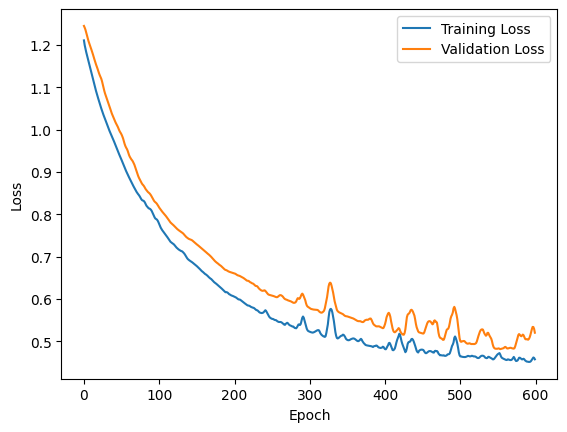

1/1 [==============================] - 0s 29ms/step - loss: 0.5428 - accuracy: 0.7273 - false_negatives_2: 3.0000 - false_positives_2: 0.0000e+00
Test Loss: 0.5428
Test Accuracy: 72.73%
False Negatives: 3
False Positives: 0
1/1 [==============================] - 0s 77ms/step
Confusion Matrix:
[[4 0]
 [3 4]]


In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
### need to add some dropeout
# Define the model with kernel regularization
model = tf.keras.Sequential([
    tf.keras.layers.Dense(20, activation='relu', input_shape=(14,), kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dense(15, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dense(10, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dense(5, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy', tf.keras.metrics.FalseNegatives(), tf.keras.metrics.FalsePositives()])

# Train the model
history = model.fit(x_train, y_train, epochs=600, validation_data=(x_val, y_val), verbose=2)

# Plot the training loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model on the test data
test_loss, test_accuracy, false_negatives, false_positives = model.evaluate(x_test, y_test) #Returns the loss value & metrics values for the model in test mode (this is for testing time, with the testing dataset).

print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy*100:.2f}%")
print(f"False Negatives: {false_negatives:.0f}")
print(f"False Positives: {false_positives:.0f}")

# Make predictions on test data
y_pred = model.predict(x_test)
y_pred_binary = (y_pred >= 0.5).astype(int)

# Calculate confusion matrix
confusion = confusion_matrix(y_test, y_pred_binary)
print("Confusion Matrix:")
print(confusion)

In [ ]:
del model